# Post Processing of George Bush's Press Briefings

#### Import all relevant libraries

In [17]:
import pandas as pd
import math as ma
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid') #'538' 'fivethirtyeight'
%matplotlib inline

#### Import the webscraped press briefings and their corresponding info

In [2]:
raw_df = pd.read_csv('/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/george_w_bush/george/george.csv')
print("The shape of the dataframe is", raw_df.shape, "\n")
print("The columns are", raw_df.columns)

The shape of the dataframe is (1762, 4) 

The columns are Index(['address', 'date', 'title', 'transcript'], dtype='object')


#### Create a copy of the raw_df

In [3]:
george_df = raw_df.copy()

#### Change the case of the press briefing text for searchability

In [4]:
george_df['transcript'] = george_df['transcript'].str.lower()

#### Convert date to pandas datetime object and create new columns for later group by

In [5]:
george_df['date_time'] = pd.to_datetime(george_df['date'])
george_df.index = pd.to_datetime(george_df['date'])
george_df['year'] = pd.DatetimeIndex(george_df['date_time']).year
george_df['month'] = pd.DatetimeIndex(george_df['date_time']).month
george_df['month_year'] = pd.to_datetime(george_df['date_time']).dt.to_period('M')

In [6]:
george_df.groupby(by=[george_df.index.month, george_df.index.year]).sum()

year  month
date date              
1    2001  12006      6
     2002  18018      9
     2003  36054     18
     2004  32064     16
     2005  32080     16
...          ...    ...
12   2004  32064    192
     2005  44110    264
     2006  28084    168
     2007  36126    216
     2008  38152    228

[97 rows x 2 columns]

#### Import a list of policy names and countries names. Make these into columns. Then count the occurence of the names in each of the briefings.

In [7]:
policy_df = pd.read_csv('/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/_data/policies/policy_names.csv')
policy_df['policy'] = policy_df['policy'].str.lower()
policy_df['policy'] = policy_df['policy'].str.strip()
policy_df['policy_type'] = policy_df['policy_type'].str.lower()

for pol in policy_df['policy']:
    george_df[pol] = george_df['transcript'].str.count(pol)

In [8]:
country_df = pd.read_csv('/Users/michaellink/Desktop/__NYCDSA/_Projects/web_scraping/presidents/How_to_Talk_Like_a_President/_data/list_of_countries/country_keyword_list.csv', header=0)
country_df.columns = ['country']
country_df['country'] = country_df['country'].str.lower()

for pais in country_df['country']:
    george_df[pais] = george_df['transcript'].str.count(pais)

#### Info about george_df

In [9]:
print("The shape of the dataframe is", george_df.shape, "\n")
print("The columns are", george_df.columns)

The shape of the dataframe is (1762, 250) 

The columns are Index(['address', 'date', 'title', 'transcript', 'date_time', 'year', 'month',
       'month_year', 'death penalty', 'drug policy',
       ...
       'uzbekistan', 'vanuatu', 'vatican', 'venezuela', 'vietnam', 'wales',
       'welsh', 'yemen', 'zambia', 'zimbabwe'],
      dtype='object', length=250)


In [10]:
george_df.head()

,address,date,title,transcript,date_time,year,month,month_year,death penalty,drug policy,...,uzbekistan,vanuatu,vatican,venezuela,vietnam,wales,welsh,yemen,zambia,zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2009-01-16,https://georgewbush-whitehouse.archives.gov/ne...,"Jan. 16, 2009",Press Briefing by Press Secretary Dana Perino,"ms. perino: welcome, everyone, to the last pre...",2009-01-16,2009,1,2009-01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-10-15,https://georgewbush-whitehouse.archives.gov/ne...,"Oct. 15, 2008",Press Gaggle by Deputy Press Secretary Tony Fr...,mr. fratto: how are you doing? we're on our wa...,2008-10-15,2008,10,2008-10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-10-16,https://georgewbush-whitehouse.archives.gov/ne...,"Oct. 16, 2008",Press Briefing by Press Secretary Dana Perino,"ms. perino: hello, everybody. a couple of anno...",2008-10-16,2008,10,2008-10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-10-17,https://georgewbush-whitehouse.archives.gov/ne...,"Oct. 17, 2008",Press Briefing by Press Secretary Dana Perino,"ms. perino: hello, happy friday. a couple of t...",2008-10-17,2008,10,2008-10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-10-20,https://georgewbush-whitehouse.archives.gov/ne...,"Oct. 20, 2008",Press Gaggle by Press Secretary Dana Perino,ms. perino: a couple things for you. we are on...,2008-10-20,2008,10,2008-10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Using group by to sum up counts by month

In [31]:
month_year_df = george_df.groupby("month_year", as_index=False).sum()
month_year_df.head()

,month_year,year,month,death penalty,drug policy,incarcer,gun control,shooting,abortion,pro life,...,uzbekistan,vanuatu,vatican,venezuela,vietnam,wales,welsh,yemen,zambia,zimbabwe
0,2001-01,12006,6,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2001-02,20010,20,0.0,0.0,0.0,2.0,7.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2001-03,28014,42,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2001-04,28014,56,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0
4,2001-05,30015,75,9.0,1.0,3.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0


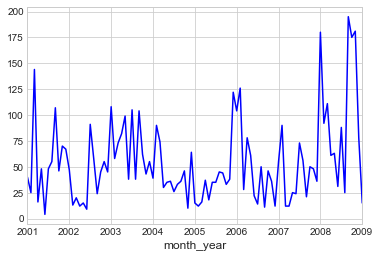

In [21]:

month_year_df['economy'].plot.line(color='b')

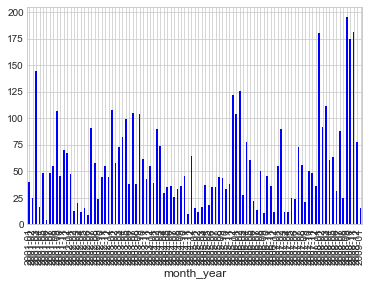

In [26]:
month_year_df['economy'].plot.bar(color='b')

In [36]:
month_year_df['month_year'] = month_year_df['month_year'].to_timestamp()

AttributeError: 'Int64Index' object has no attribute 'to_timestamp'

ConversionError: Failed to convert value(s) to axis units: array([Period('2001-01', 'M'), Period('2001-02', 'M'),
       Period('2001-03', 'M'), Period('2001-04', 'M'),
       Period('2001-05', 'M'), Period('2001-06', 'M'),
       Period('2001-07', 'M'), Period('2001-08', 'M'),
       Period('2001-09', 'M'), Period('2001-10', 'M'),
       Period('2001-11', 'M'), Period('2001-12', 'M'),
       Period('2002-01', 'M'), Period('2002-02', 'M'),
       Period('2002-03', 'M'), Period('2002-04', 'M'),
       Period('2002-05', 'M'), Period('2002-06', 'M'),
       Period('2002-07', 'M'), Period('2002-08', 'M'),
       Period('2002-09', 'M'), Period('2002-10', 'M'),
       Period('2002-11', 'M'), Period('2002-12', 'M'),
       Period('2003-01', 'M'), Period('2003-02', 'M'),
       Period('2003-03', 'M'), Period('2003-04', 'M'),
       Period('2003-05', 'M'), Period('2003-06', 'M'),
       Period('2003-07', 'M'), Period('2003-08', 'M'),
       Period('2003-09', 'M'), Period('2003-10', 'M'),
       Period('2003-11', 'M'), Period('2003-12', 'M'),
       Period('2004-01', 'M'), Period('2004-02', 'M'),
       Period('2004-03', 'M'), Period('2004-04', 'M'),
       Period('2004-05', 'M'), Period('2004-06', 'M'),
       Period('2004-07', 'M'), Period('2004-08', 'M'),
       Period('2004-09', 'M'), Period('2004-10', 'M'),
       Period('2004-11', 'M'), Period('2004-12', 'M'),
       Period('2005-01', 'M'), Period('2005-02', 'M'),
       Period('2005-03', 'M'), Period('2005-04', 'M'),
       Period('2005-05', 'M'), Period('2005-06', 'M'),
       Period('2005-07', 'M'), Period('2005-08', 'M'),
       Period('2005-09', 'M'), Period('2005-10', 'M'),
       Period('2005-11', 'M'), Period('2005-12', 'M'),
       Period('2006-01', 'M'), Period('2006-02', 'M'),
       Period('2006-03', 'M'), Period('2006-04', 'M'),
       Period('2006-05', 'M'), Period('2006-06', 'M'),
       Period('2006-07', 'M'), Period('2006-08', 'M'),
       Period('2006-09', 'M'), Period('2006-10', 'M'),
       Period('2006-11', 'M'), Period('2006-12', 'M'),
       Period('2007-01', 'M'), Period('2007-02', 'M'),
       Period('2007-03', 'M'), Period('2007-04', 'M'),
       Period('2007-05', 'M'), Period('2007-06', 'M'),
       Period('2007-07', 'M'), Period('2007-08', 'M'),
       Period('2007-09', 'M'), Period('2007-10', 'M'),
       Period('2007-11', 'M'), Period('2007-12', 'M'),
       Period('2008-01', 'M'), Period('2008-02', 'M'),
       Period('2008-03', 'M'), Period('2008-04', 'M'),
       Period('2008-05', 'M'), Period('2008-06', 'M'),
       Period('2008-07', 'M'), Period('2008-08', 'M'),
       Period('2008-09', 'M'), Period('2008-10', 'M'),
       Period('2008-11', 'M'), Period('2008-12', 'M'),
       Period('2009-01', 'M')], dtype=object)

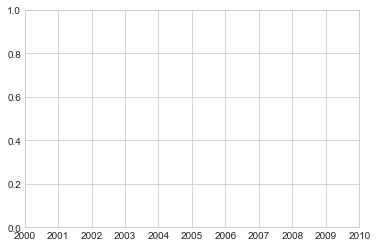

In [34]:
fig = plt.figure()
ax = plt.axes()


plt.plot_date(month_year_df['month_year'], month_year_df['economy'])


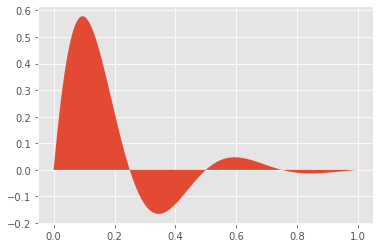

In [16]:
x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()